In [1]:
import os
if not os.path.exists('GTSRB'):
    !pip install -U -q torch_snippets
    !wget -qq https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
    !wget -qq https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
    !unzip -qq GTSRB_Final_Training_Images.zip
    !unzip -qq GTSRB_Final_Test_Images.zip
    !wget https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv
    !rm GTSRB_Final_Training_Images.zip GTSRB_Final_Test_Images.zip
    

     |████████████████████████████████| 61kB 5.7MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 
     |████████████████████████████████| 215kB 32.5MB/s 
     |████████████████████████████████| 51kB 6.4MB/s 
--2021-07-06 07:56:23--  https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999 [text/plain]
Saving to: ‘signnames.csv’

signnames.csv       100%[===================>]     999  --.-KB/s    in 0s      

2021-07-06 07:56:23 (42.7 MB/s) - ‘signnames.csv’ saved [999/999]



2021-07-06 07:56:29.301 | WARNING  | torch_snippets.torch_loader:<module>:233 - Not importing Lightning Report
2021-07-06 07:56:30.009 | WARNING  | torch_snippets:<module>:13 - sklearn is not found. Skipping relevant imports from submodule `sklegos`
Exception: No module named 'sklego'
2021-07-06 07:56:30.141 | INFO     | __main__:<module>:69 - 39209 files found at GTSRB/Final_Training/Images/*/*.ppm
2021-07-06 07:56:30.173 | INFO     | __main__:__init__:46 - 29406
2021-07-06 07:56:30.175 | INFO     | __main__:__init__:46 - 9803
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


EPOCH: 1.000	trn_loss: 2.339	trn_acc: 0.313	val_loss: 1.303	val_acc: 0.571	(35.66s - 1390.67s remaining)
EPOCH: 2.000	trn_loss: 1.012	trn_acc: 0.667	val_loss: 0.810	val_acc: 0.728	(70.80s - 1345.21s remaining)
EPOCH: 3.000	trn_loss: 0.678	trn_acc: 0.777	val_loss: 0.612	val_acc: 0.797	(105.84s - 1305.39s remaining)
EPOCH: 4.000	trn_loss: 0.556	trn_acc: 0.816	val_loss: 0.525	val_acc: 0.824	(140.77s - 1266.92s remaining)
EPOCH: 5.000	trn_loss: 0.470	trn_acc: 0.845	val_loss: 0.480	val_acc: 0.844	(175.69s - 1229.85s remaining)
EPOCH: 6.000	trn_loss: 0.429	trn_acc: 0.861	val_loss: 0.412	val_acc: 0.866	(210.83s - 1194.70s remaining)
EPOCH: 7.000	trn_loss: 0.389	trn_acc: 0.874	val_loss: 0.411	val_acc: 0.870	(245.58s - 1157.72s remaining)
EPOCH: 8.000	trn_loss: 0.369	trn_acc: 0.882	val_loss: 0.416	val_acc: 0.866	(280.35s - 1121.39s remaining)
EPOCH: 9.000	trn_loss: 0.345	trn_acc: 0.890	val_loss: 0.417	val_acc: 0.870	(314.97s - 1084.91s remaining)
EPOCH: 10.000	trn_loss: 0.324	trn_acc: 0.895	val

  0%|          | 0/141 [00:00<?, ?it/s]

EPOCH: 40.000	trn_loss: 0.117	trn_acc: 0.962	val_loss: 0.161	val_acc: 0.946	(1380.99s - 0.00s remaining)


100%|██████████| 141/141 [00:04<00:00, 31.95it/s]


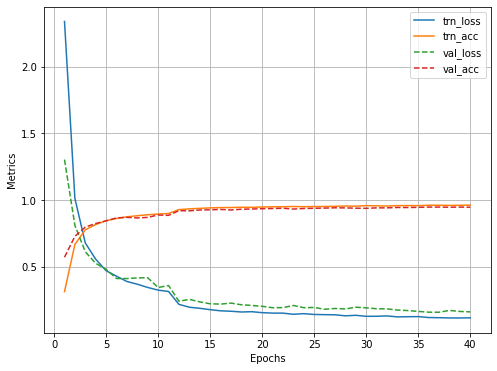

2021-07-06 08:19:47.880 | INFO     | __main__:<module>:151 - Dumped object of size ≈2 MB @ "no-aug-no-bn.log" in 1.97e+00 seconds


In [2]:
from torch_snippets import *
classIds = pd.read_csv('signnames.csv')
classIds.set_index('ClassId', inplace=True)
classIds = classIds.to_dict()['SignName']
classIds = {f'{k:05d}':v for k,v in classIds.items()}
id2int = {v:ix for ix,(k,v) in enumerate(classIds.items())}

from torchvision import transforms as T
classIds = pd.read_csv('signnames.csv')
classIds.set_index('ClassId', inplace=True)
classIds = classIds.to_dict()['SignName']
classIds = {f'{k:05d}':v for k,v in classIds.items()}
id2int = {v:ix for ix,(k,v) in enumerate(classIds.items())}

from torchvision import transforms as T

trn_tfms = T.Compose([
    T.ToPILImage(),
    T.Resize(32),
    T.CenterCrop(32),
    # T.ColorJitter(brightness=(0.8,1.2), 
    # contrast=(0.8,1.2), 
    # saturation=(0.8,1.2), 
    # hue=0.25),
    # T.RandomAffine(5, translate=(0.01,0.1)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225]),
])

val_tfms = T.Compose([
    T.ToPILImage(),
    T.Resize(32),
    T.CenterCrop(32),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225]),
])

class GTSRB(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, files, transform=None):
        self.files = files
        self.transform = transform
        logger.info(len(self))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, ix):
        fpath = self.files[ix]
        clss = fname(parent(fpath))
        img = read(fpath, 1)
        return img, classIds[clss]

    def choose(self):
        return self[randint(len(self))]

    def collate_fn(self, batch):
        imgs, classes = list(zip(*batch))
        if self.transform:
            imgs = [self.transform(img)[None] for img in imgs]
        classes = [torch.tensor([id2int[clss]]) for clss in classes]
        imgs, classes = [torch.cat(i).to(device) for i in [imgs, classes]]
        return imgs, classes

device = 'cuda' if torch.cuda.is_available() else 'cpu'
all_files = Glob('GTSRB/Final_Training/Images/*/*.ppm')
np.random.seed(10)
np.random.shuffle(all_files)

from sklearn.model_selection import train_test_split
trn_files, val_files = train_test_split(all_files, random_state=1)

trn_ds = GTSRB(trn_files, transform=trn_tfms)
val_ds = GTSRB(val_files, transform=val_tfms)
trn_dl = DataLoader(trn_ds, 32, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, 32, shuffle=False, collate_fn=val_ds.collate_fn)

import torchvision.models as models

def convBlock(ni, no):
    return nn.Sequential(
        nn.Dropout(0.2),
        nn.Conv2d(ni, no, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        #nn.BatchNorm2d(no),
        nn.MaxPool2d(2),
    )
    
class SignClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            convBlock(3, 64),
            convBlock(64, 64),
            convBlock(64, 128),
            convBlock(128, 64),
            nn.Flatten(),
            nn.Linear(256, 256),
            nn.Dropout(0.2),
            nn.ReLU(inplace=True),
            nn.Linear(256, len(id2int))
        )
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def compute_metrics(self, preds, targets):
        ce_loss = self.loss_fn(preds, targets)
        acc = (torch.max(preds, 1)[1] == targets).float().mean()
        return ce_loss, acc
def train_batch(model, data, optimizer, criterion):
    ims, labels = data
    _preds = model(ims)
    optimizer.zero_grad()
    loss, acc = criterion(_preds, labels)
    loss.backward()
    optimizer.step()
    return loss.item(), acc.item()

@torch.no_grad()
def validate_batch(model, data, criterion):
    ims, labels = data
    _preds = model(ims)
    loss, acc = criterion(_preds, labels)
    return loss.item(), acc.item()
model = SignClassifier().to(device)
criterion = model.compute_metrics
optimizer = optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 40

log = Report(n_epochs)
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss, acc = train_batch(model, data, optimizer, criterion)
        log.record(ex+(bx+1)/N, trn_loss=loss, trn_acc=acc, end='\r')

    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss, acc = validate_batch(model, data, criterion)
        log.record(ex+(bx+1)/N, val_loss=loss, val_acc=acc, end='\r')
        
    log.report_avgs(ex+1)
    if ex == 10: optimizer = optim.Adam(model.parameters(), lr=1e-4)

log.plot_epochs()
dumpdill(log, 'no-aug-no-bn.log')

2021-07-06 08:19:48.265 | INFO     | __main__:<module>:69 - 39209 files found at GTSRB/Final_Training/Images/*/*.ppm
2021-07-06 08:19:48.282 | INFO     | __main__:__init__:46 - 29406
2021-07-06 08:19:48.286 | INFO     | __main__:__init__:46 - 9803


EPOCH: 1.000	trn_loss: 1.402	trn_acc: 0.577	val_loss: 0.596	val_acc: 0.808	(36.62s - 1427.99s remaining)
EPOCH: 2.000	trn_loss: 0.435	trn_acc: 0.860	val_loss: 0.373	val_acc: 0.879	(73.47s - 1395.92s remaining)
EPOCH: 3.000	trn_loss: 0.299	trn_acc: 0.902	val_loss: 0.289	val_acc: 0.903	(110.24s - 1359.62s remaining)
EPOCH: 4.000	trn_loss: 0.229	trn_acc: 0.923	val_loss: 0.248	val_acc: 0.921	(147.37s - 1326.31s remaining)
EPOCH: 5.000	trn_loss: 0.188	trn_acc: 0.938	val_loss: 0.232	val_acc: 0.929	(184.52s - 1291.64s remaining)
EPOCH: 6.000	trn_loss: 0.170	trn_acc: 0.943	val_loss: 0.205	val_acc: 0.933	(221.61s - 1255.80s remaining)
EPOCH: 7.000	trn_loss: 0.144	trn_acc: 0.952	val_loss: 0.179	val_acc: 0.941	(258.38s - 1218.08s remaining)
EPOCH: 8.000	trn_loss: 0.132	trn_acc: 0.957	val_loss: 0.182	val_acc: 0.941	(295.36s - 1181.45s remaining)
EPOCH: 9.000	trn_loss: 0.120	trn_acc: 0.959	val_loss: 0.154	val_acc: 0.949	(332.51s - 1145.32s remaining)
EPOCH: 10.000	trn_loss: 0.114	trn_acc: 0.963	val

  0%|          | 0/141 [00:00<?, ?it/s]

EPOCH: 40.000	trn_loss: 0.018	trn_acc: 0.994	val_loss: 0.050	val_acc: 0.986	(1487.41s - 0.00s remaining)


100%|██████████| 141/141 [00:04<00:00, 30.67it/s]


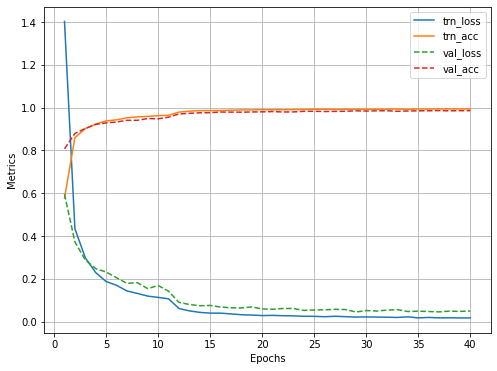

2021-07-06 08:44:42.747 | INFO     | __main__:<module>:151 - Dumped object of size ≈2 MB @ "no-aug-yes-bn.log" in 2.17e+00 seconds


In [3]:
from torch_snippets import *
classIds = pd.read_csv('signnames.csv')
classIds.set_index('ClassId', inplace=True)
classIds = classIds.to_dict()['SignName']
classIds = {f'{k:05d}':v for k,v in classIds.items()}
id2int = {v:ix for ix,(k,v) in enumerate(classIds.items())}

from torchvision import transforms as T
classIds = pd.read_csv('signnames.csv')
classIds.set_index('ClassId', inplace=True)
classIds = classIds.to_dict()['SignName']
classIds = {f'{k:05d}':v for k,v in classIds.items()}
id2int = {v:ix for ix,(k,v) in enumerate(classIds.items())}

from torchvision import transforms as T

trn_tfms = T.Compose([
    T.ToPILImage(),
    T.Resize(32),
    T.CenterCrop(32),
    # T.ColorJitter(brightness=(0.8,1.2), 
    # contrast=(0.8,1.2), 
    # saturation=(0.8,1.2), 
    # hue=0.25),
    # T.RandomAffine(5, translate=(0.01,0.1)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225]),
])

val_tfms = T.Compose([
    T.ToPILImage(),
    T.Resize(32),
    T.CenterCrop(32),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225]),
])

class GTSRB(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, files, transform=None):
        self.files = files
        self.transform = transform
        logger.info(len(self))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, ix):
        fpath = self.files[ix]
        clss = fname(parent(fpath))
        img = read(fpath, 1)
        return img, classIds[clss]

    def choose(self):
        return self[randint(len(self))]

    def collate_fn(self, batch):
        imgs, classes = list(zip(*batch))
        if self.transform:
            imgs = [self.transform(img)[None] for img in imgs]
        classes = [torch.tensor([id2int[clss]]) for clss in classes]
        imgs, classes = [torch.cat(i).to(device) for i in [imgs, classes]]
        return imgs, classes

device = 'cuda' if torch.cuda.is_available() else 'cpu'
all_files = Glob('GTSRB/Final_Training/Images/*/*.ppm')
np.random.seed(10)
np.random.shuffle(all_files)

from sklearn.model_selection import train_test_split
trn_files, val_files = train_test_split(all_files, random_state=1)

trn_ds = GTSRB(trn_files, transform=trn_tfms)
val_ds = GTSRB(val_files, transform=val_tfms)
trn_dl = DataLoader(trn_ds, 32, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, 32, shuffle=False, collate_fn=val_ds.collate_fn)

import torchvision.models as models

def convBlock(ni, no):
    return nn.Sequential(
        nn.Dropout(0.2),
        nn.Conv2d(ni, no, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(no),
        nn.MaxPool2d(2),
    )
    
class SignClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            convBlock(3, 64),
            convBlock(64, 64),
            convBlock(64, 128),
            convBlock(128, 64),
            nn.Flatten(),
            nn.Linear(256, 256),
            nn.Dropout(0.2),
            nn.ReLU(inplace=True),
            nn.Linear(256, len(id2int))
        )
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def compute_metrics(self, preds, targets):
        ce_loss = self.loss_fn(preds, targets)
        acc = (torch.max(preds, 1)[1] == targets).float().mean()
        return ce_loss, acc
def train_batch(model, data, optimizer, criterion):
    ims, labels = data
    _preds = model(ims)
    optimizer.zero_grad()
    loss, acc = criterion(_preds, labels)
    loss.backward()
    optimizer.step()
    return loss.item(), acc.item()

@torch.no_grad()
def validate_batch(model, data, criterion):
    ims, labels = data
    _preds = model(ims)
    loss, acc = criterion(_preds, labels)
    return loss.item(), acc.item()
model = SignClassifier().to(device)
criterion = model.compute_metrics
optimizer = optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 40

log = Report(n_epochs)
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss, acc = train_batch(model, data, optimizer, criterion)
        log.record(ex+(bx+1)/N, trn_loss=loss, trn_acc=acc, end='\r')

    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss, acc = validate_batch(model, data, criterion)
        log.record(ex+(bx+1)/N, val_loss=loss, val_acc=acc, end='\r')
        
    log.report_avgs(ex+1)
    if ex == 10: optimizer = optim.Adam(model.parameters(), lr=1e-4)

log.plot_epochs()
dumpdill(log, 'no-aug-yes-bn.log')

2021-07-06 08:44:43.142 | INFO     | __main__:<module>:69 - 39209 files found at GTSRB/Final_Training/Images/*/*.ppm
2021-07-06 08:44:43.160 | INFO     | __main__:__init__:46 - 29406
2021-07-06 08:44:43.164 | INFO     | __main__:__init__:46 - 9803


EPOCH: 1.000	trn_loss: 1.829	trn_acc: 0.465	val_loss: 0.769	val_acc: 0.754	(60.48s - 2358.74s remaining)
EPOCH: 2.000	trn_loss: 0.684	trn_acc: 0.781	val_loss: 0.484	val_acc: 0.842	(120.82s - 2295.60s remaining)
EPOCH: 3.000	trn_loss: 0.486	trn_acc: 0.843	val_loss: 0.410	val_acc: 0.864	(180.40s - 2224.95s remaining)
EPOCH: 4.000	trn_loss: 0.395	trn_acc: 0.871	val_loss: 0.306	val_acc: 0.899	(240.54s - 2164.83s remaining)
EPOCH: 5.000	trn_loss: 0.332	trn_acc: 0.890	val_loss: 0.269	val_acc: 0.911	(300.17s - 2101.16s remaining)
EPOCH: 6.000	trn_loss: 0.296	trn_acc: 0.902	val_loss: 0.296	val_acc: 0.901	(358.59s - 2031.99s remaining)
EPOCH: 7.000	trn_loss: 0.280	trn_acc: 0.908	val_loss: 0.218	val_acc: 0.925	(416.56s - 1963.77s remaining)
EPOCH: 8.000	trn_loss: 0.243	trn_acc: 0.919	val_loss: 0.200	val_acc: 0.932	(475.27s - 1901.07s remaining)
EPOCH: 9.000	trn_loss: 0.233	trn_acc: 0.926	val_loss: 0.198	val_acc: 0.936	(533.78s - 1838.57s remaining)
EPOCH: 10.000	trn_loss: 0.215	trn_acc: 0.929	va

  0%|          | 0/141 [00:00<?, ?it/s]

EPOCH: 40.000	trn_loss: 0.072	trn_acc: 0.976	val_loss: 0.071	val_acc: 0.977	(2368.66s - 0.00s remaining)


100%|██████████| 141/141 [00:05<00:00, 25.36it/s]


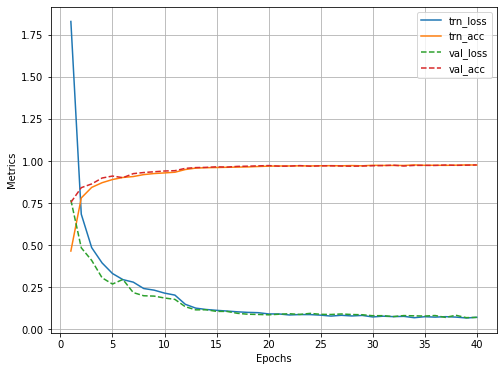

2021-07-06 09:24:19.790 | INFO     | __main__:<module>:151 - Dumped object of size ≈2 MB @ "40-yes-aug-yes-bn.log" in 2.07e+00 seconds


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
from torch_snippets import *
classIds = pd.read_csv('signnames.csv')
classIds.set_index('ClassId', inplace=True)
classIds = classIds.to_dict()['SignName']
classIds = {f'{k:05d}':v for k,v in classIds.items()}
id2int = {v:ix for ix,(k,v) in enumerate(classIds.items())}

from torchvision import transforms as T
classIds = pd.read_csv('signnames.csv')
classIds.set_index('ClassId', inplace=True)
classIds = classIds.to_dict()['SignName']
classIds = {f'{k:05d}':v for k,v in classIds.items()}
id2int = {v:ix for ix,(k,v) in enumerate(classIds.items())}

from torchvision import transforms as T

trn_tfms = T.Compose([
    T.ToPILImage(),
    T.Resize(32),
    T.CenterCrop(32),
    T.ColorJitter(brightness=(0.8,1.2), 
    contrast=(0.8,1.2), 
    saturation=(0.8,1.2), 
    hue=0.25),
    T.RandomAffine(5, translate=(0.01,0.1)),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225]),
])

val_tfms = T.Compose([
    T.ToPILImage(),
    T.Resize(32),
    T.CenterCrop(32),
    T.ToTensor(),
    T.Normalize(mean=[0.485, 0.456, 0.406], 
                std=[0.229, 0.224, 0.225]),
])

class GTSRB(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, files, transform=None):
        self.files = files
        self.transform = transform
        logger.info(len(self))

    def __len__(self):
        return len(self.files)

    def __getitem__(self, ix):
        fpath = self.files[ix]
        clss = fname(parent(fpath))
        img = read(fpath, 1)
        return img, classIds[clss]

    def choose(self):
        return self[randint(len(self))]

    def collate_fn(self, batch):
        imgs, classes = list(zip(*batch))
        if self.transform:
            imgs = [self.transform(img)[None] for img in imgs]
        classes = [torch.tensor([id2int[clss]]) for clss in classes]
        imgs, classes = [torch.cat(i).to(device) for i in [imgs, classes]]
        return imgs, classes

device = 'cuda' if torch.cuda.is_available() else 'cpu'
all_files = Glob('GTSRB/Final_Training/Images/*/*.ppm')
np.random.seed(10)
np.random.shuffle(all_files)

from sklearn.model_selection import train_test_split
trn_files, val_files = train_test_split(all_files, random_state=1)

trn_ds = GTSRB(trn_files, transform=trn_tfms)
val_ds = GTSRB(val_files, transform=val_tfms)
trn_dl = DataLoader(trn_ds, 32, shuffle=True, collate_fn=trn_ds.collate_fn)
val_dl = DataLoader(val_ds, 32, shuffle=False, collate_fn=val_ds.collate_fn)

import torchvision.models as models

def convBlock(ni, no):
    return nn.Sequential(
        nn.Dropout(0.2),
        nn.Conv2d(ni, no, kernel_size=3, padding=1),
        nn.ReLU(inplace=True),
        nn.BatchNorm2d(no),
        nn.MaxPool2d(2),
    )
    
class SignClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            convBlock(3, 64),
            convBlock(64, 64),
            convBlock(64, 128),
            convBlock(128, 64),
            nn.Flatten(),
            nn.Linear(256, 256),
            nn.Dropout(0.2),
            nn.ReLU(inplace=True),
            nn.Linear(256, len(id2int))
        )
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def compute_metrics(self, preds, targets):
        ce_loss = self.loss_fn(preds, targets)
        acc = (torch.max(preds, 1)[1] == targets).float().mean()
        return ce_loss, acc
def train_batch(model, data, optimizer, criterion):
    ims, labels = data
    _preds = model(ims)
    optimizer.zero_grad()
    loss, acc = criterion(_preds, labels)
    loss.backward()
    optimizer.step()
    return loss.item(), acc.item()

@torch.no_grad()
def validate_batch(model, data, criterion):
    ims, labels = data
    _preds = model(ims)
    loss, acc = criterion(_preds, labels)
    return loss.item(), acc.item()
model = SignClassifier().to(device)
criterion = model.compute_metrics
optimizer = optim.Adam(model.parameters(), lr=1e-3)
n_epochs = 40

log = Report(n_epochs)
for ex in range(n_epochs):
    N = len(trn_dl)
    for bx, data in enumerate(trn_dl):
        loss, acc = train_batch(model, data, optimizer, criterion)
        log.record(ex+(bx+1)/N, trn_loss=loss, trn_acc=acc, end='\r')

    N = len(val_dl)
    for bx, data in enumerate(val_dl):
        loss, acc = validate_batch(model, data, criterion)
        log.record(ex+(bx+1)/N, val_loss=loss, val_acc=acc, end='\r')
        
    log.report_avgs(ex+1)
    if ex == 10: optimizer = optim.Adam(model.parameters(), lr=1e-4)

log.plot_epochs()
dumpdill(log, '40-yes-aug-yes-bn.log')
from google.colab import files
files.download('40-yes-aug-yes-bn.log')

2021-07-06 09:24:19.815 | INFO     | __main__:<module>:1 - 3 files found at *.log
  4%|▍         | 6/141 [00:00<00:02, 51.25it/s]


EPOCH: 20.000	trn_loss: 0.092	trn_acc: 0.970	val_loss: 0.086	val_acc: 0.973	(2376.88s - 2376.88s remaining)


100%|██████████| 141/141 [00:02<00:00, 62.11it/s]


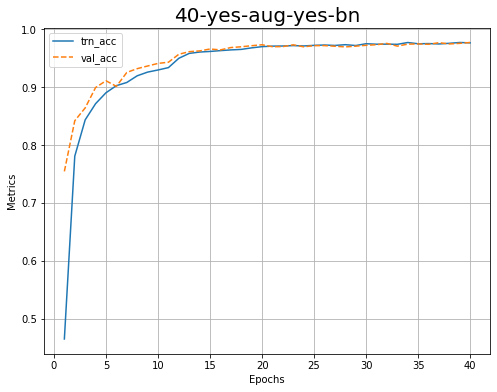

  4%|▎         | 5/141 [00:00<00:02, 46.24it/s]

EPOCH: 20.000	trn_loss: 0.156	trn_acc: 0.947	val_loss: 0.203	val_acc: 0.935	(5262.83s - 5262.83s remaining)


100%|██████████| 141/141 [00:02<00:00, 55.03it/s]


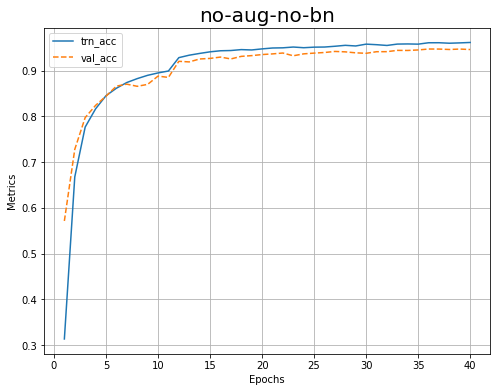

  4%|▎         | 5/141 [00:00<00:03, 44.82it/s]


EPOCH: 20.000	trn_loss: 0.029	trn_acc: 0.990	val_loss: 0.059	val_acc: 0.980	(3877.82s - 3877.82s remaining)


100%|██████████| 141/141 [00:02<00:00, 54.83it/s]


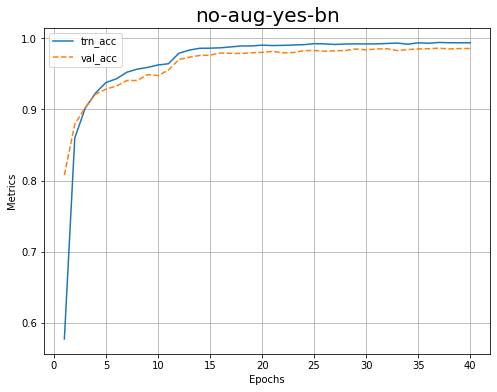

In [5]:
for f in Glob('*.log'):
    log = loaddill(f)
    print()
    log.report_avgs(20)
    log.plot_epochs(['trn_acc', 'val_acc'], title=f.replace(',','\n').replace('.log',''))
    print()
    line()